## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.170631  1.223418 -1.142517  0.334619 -1.732576  0.907566
1  1.410191  1.414467 -1.497232 -1.245383  1.552229  0.021360
2 -1.382717  1.562308 -1.153465  1.594781 -0.070879  0.639258
3 -1.037164  0.286288  1.415591 -0.066578  1.401519  0.424072
4  1.181127 -0.798215 -0.840200  0.620777 -1.463522  0.190696


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0126841	total: 57.4ms	remaining: 57.4s
1:	learn: 1.0060802	total: 57.9ms	remaining: 28.9s
2:	learn: 0.9980261	total: 58.4ms	remaining: 19.4s
3:	learn: 0.9889725	total: 58.8ms	remaining: 14.6s
4:	learn: 0.9815122	total: 59.2ms	remaining: 11.8s
5:	learn: 0.9729527	total: 59.8ms	remaining: 9.91s
6:	learn: 0.9647752	total: 60.2ms	remaining: 8.54s
7:	learn: 0.9575250	total: 60.9ms	remaining: 7.55s
8:	learn: 0.9503282	total: 61.4ms	remaining: 6.75s
9:	learn: 0.9432996	total: 61.8ms	remaining: 6.12s
10:	learn: 0.9351285	total: 62.3ms	remaining: 5.6s
11:	learn: 0.9259761	total: 62.7ms	remaining: 5.16s
12:	learn: 0.9179040	total: 63.1ms	remaining: 4.79s
13:	learn: 0.9102216	total: 63.6ms	remaining: 4.48s
14:	learn: 0.9031250	total: 64.1ms	remaining: 4.21s
15:	learn: 0.8963901	total: 64.5ms	remaining: 3.97s
16:	learn: 0.8900723	total: 64.9ms	remaining: 3.75s
17:	learn: 0.8824343	total: 65.4ms	remaining: 3.56s
18:	learn: 0.8727634	total: 65.8ms	remaining:

109:	learn: 0.4488642	total: 107ms	remaining: 870ms
110:	learn: 0.4459939	total: 108ms	remaining: 865ms
111:	learn: 0.4419232	total: 108ms	remaining: 860ms
112:	learn: 0.4388982	total: 109ms	remaining: 854ms
113:	learn: 0.4357741	total: 109ms	remaining: 849ms
114:	learn: 0.4329624	total: 110ms	remaining: 844ms
115:	learn: 0.4307448	total: 110ms	remaining: 840ms
116:	learn: 0.4276934	total: 111ms	remaining: 835ms
117:	learn: 0.4250832	total: 111ms	remaining: 830ms
118:	learn: 0.4221314	total: 112ms	remaining: 826ms
119:	learn: 0.4194384	total: 112ms	remaining: 821ms
120:	learn: 0.4164560	total: 112ms	remaining: 817ms
121:	learn: 0.4141654	total: 113ms	remaining: 812ms
122:	learn: 0.4109466	total: 113ms	remaining: 808ms
123:	learn: 0.4082088	total: 114ms	remaining: 803ms
124:	learn: 0.4057904	total: 114ms	remaining: 800ms
125:	learn: 0.4027309	total: 115ms	remaining: 795ms
126:	learn: 0.4000739	total: 115ms	remaining: 790ms
127:	learn: 0.3976348	total: 115ms	remaining: 786ms
128:	learn: 

283:	learn: 0.1562278	total: 186ms	remaining: 469ms
284:	learn: 0.1552351	total: 187ms	remaining: 468ms
285:	learn: 0.1542585	total: 187ms	remaining: 467ms
286:	learn: 0.1535104	total: 187ms	remaining: 466ms
287:	learn: 0.1528257	total: 188ms	remaining: 465ms
288:	learn: 0.1521578	total: 188ms	remaining: 463ms
289:	learn: 0.1517119	total: 189ms	remaining: 462ms
290:	learn: 0.1512366	total: 189ms	remaining: 462ms
291:	learn: 0.1505333	total: 190ms	remaining: 460ms
292:	learn: 0.1496422	total: 190ms	remaining: 459ms
293:	learn: 0.1492163	total: 191ms	remaining: 458ms
294:	learn: 0.1483563	total: 191ms	remaining: 457ms
295:	learn: 0.1479769	total: 192ms	remaining: 456ms
296:	learn: 0.1468589	total: 192ms	remaining: 455ms
297:	learn: 0.1459430	total: 192ms	remaining: 453ms
298:	learn: 0.1455776	total: 193ms	remaining: 452ms
299:	learn: 0.1448461	total: 193ms	remaining: 451ms
300:	learn: 0.1445004	total: 194ms	remaining: 450ms
301:	learn: 0.1435918	total: 194ms	remaining: 449ms
302:	learn: 

496:	learn: 0.0525159	total: 290ms	remaining: 294ms
497:	learn: 0.0522090	total: 291ms	remaining: 293ms
498:	learn: 0.0519548	total: 291ms	remaining: 293ms
499:	learn: 0.0518686	total: 292ms	remaining: 292ms
500:	learn: 0.0515682	total: 292ms	remaining: 291ms
501:	learn: 0.0513212	total: 293ms	remaining: 291ms
502:	learn: 0.0510831	total: 293ms	remaining: 290ms
503:	learn: 0.0508854	total: 294ms	remaining: 289ms
504:	learn: 0.0506095	total: 294ms	remaining: 289ms
505:	learn: 0.0505283	total: 295ms	remaining: 288ms
506:	learn: 0.0504473	total: 295ms	remaining: 287ms
507:	learn: 0.0501420	total: 296ms	remaining: 286ms
508:	learn: 0.0499094	total: 296ms	remaining: 286ms
509:	learn: 0.0496709	total: 297ms	remaining: 285ms
510:	learn: 0.0494441	total: 297ms	remaining: 285ms
511:	learn: 0.0491485	total: 298ms	remaining: 284ms
512:	learn: 0.0489275	total: 298ms	remaining: 283ms
513:	learn: 0.0487052	total: 299ms	remaining: 282ms
514:	learn: 0.0484757	total: 299ms	remaining: 282ms
515:	learn: 

658:	learn: 0.0274489	total: 370ms	remaining: 191ms
659:	learn: 0.0273430	total: 370ms	remaining: 191ms
660:	learn: 0.0272394	total: 371ms	remaining: 190ms
661:	learn: 0.0271361	total: 371ms	remaining: 190ms
662:	learn: 0.0270705	total: 372ms	remaining: 189ms
663:	learn: 0.0269441	total: 372ms	remaining: 188ms
664:	learn: 0.0268312	total: 373ms	remaining: 188ms
665:	learn: 0.0267316	total: 373ms	remaining: 187ms
666:	learn: 0.0266320	total: 374ms	remaining: 187ms
667:	learn: 0.0265638	total: 374ms	remaining: 186ms
668:	learn: 0.0264964	total: 375ms	remaining: 185ms
669:	learn: 0.0264299	total: 375ms	remaining: 185ms
670:	learn: 0.0263441	total: 376ms	remaining: 184ms
671:	learn: 0.0262474	total: 376ms	remaining: 184ms
672:	learn: 0.0261819	total: 377ms	remaining: 183ms
673:	learn: 0.0260980	total: 377ms	remaining: 182ms
674:	learn: 0.0260371	total: 377ms	remaining: 182ms
675:	learn: 0.0258912	total: 378ms	remaining: 181ms
676:	learn: 0.0257475	total: 378ms	remaining: 180ms
677:	learn: 

881:	learn: 0.0124230	total: 475ms	remaining: 63.5ms
882:	learn: 0.0123557	total: 475ms	remaining: 63ms
883:	learn: 0.0123212	total: 476ms	remaining: 62.4ms
884:	learn: 0.0122475	total: 476ms	remaining: 61.9ms
885:	learn: 0.0122336	total: 477ms	remaining: 61.3ms
886:	learn: 0.0122198	total: 477ms	remaining: 60.8ms
887:	learn: 0.0121826	total: 478ms	remaining: 60.2ms
888:	learn: 0.0121606	total: 478ms	remaining: 59.7ms
889:	learn: 0.0120892	total: 478ms	remaining: 59.1ms
890:	learn: 0.0120762	total: 479ms	remaining: 58.6ms
891:	learn: 0.0120589	total: 479ms	remaining: 58ms
892:	learn: 0.0120250	total: 480ms	remaining: 57.5ms
893:	learn: 0.0120117	total: 480ms	remaining: 57ms
894:	learn: 0.0119839	total: 481ms	remaining: 56.4ms
895:	learn: 0.0119707	total: 481ms	remaining: 55.9ms
896:	learn: 0.0119380	total: 482ms	remaining: 55.3ms
897:	learn: 0.0119105	total: 483ms	remaining: 54.8ms
898:	learn: 0.0118979	total: 484ms	remaining: 54.4ms
899:	learn: 0.0118707	total: 484ms	remaining: 53.8ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

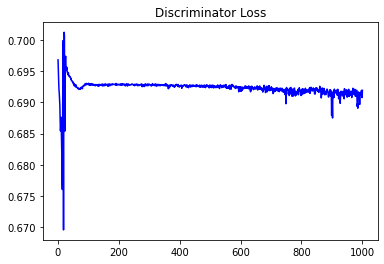

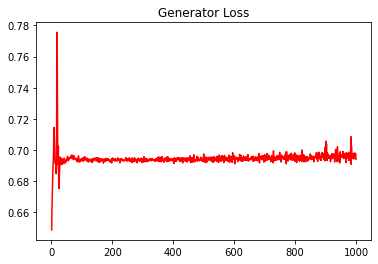

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.10756137104312417


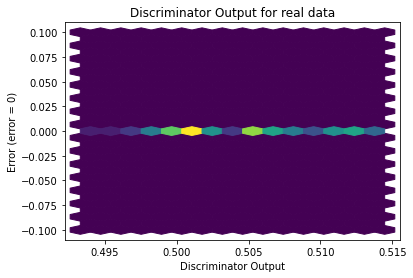

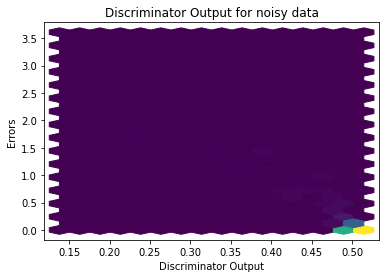

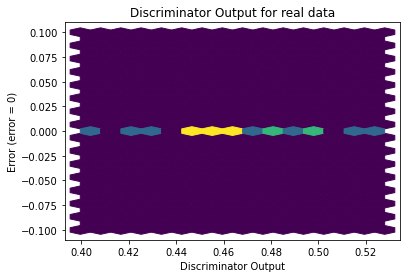

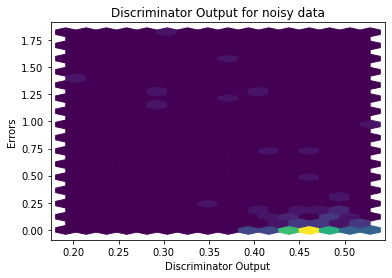

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


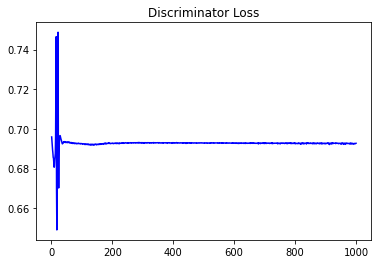

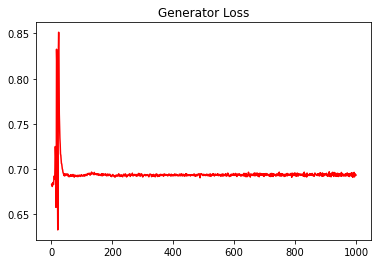

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.12327887399077049


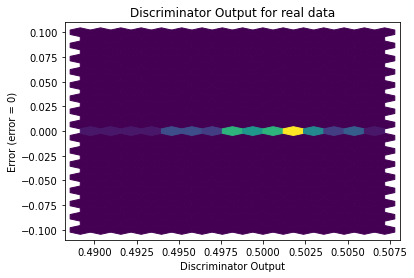

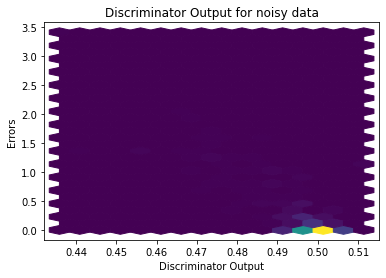

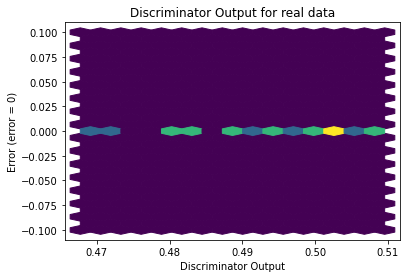

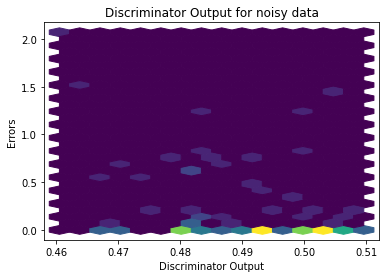

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.8861]], requires_grad=True)
